In [33]:
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import tensorflow as tf
import glob
import shutil
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import os
os.chdir(r"/Users/priyankadwivedi/Documents/Kaggle/CatvsDogs/train")

In [11]:
#Take all images for cats and dogs and convert to grayscale and resize to 56,56
size = 56, 56
for infile in glob.glob("/Users/priyankadwivedi/Documents/Kaggle/CatvsDogs/train/*.jpg"):
    outfile = os.path.splitext(infile)[0] + ".small"    
    file, ext = os.path.splitext(infile)
    im = Image.open(infile).convert("L")
    out = im.resize((size))
    out.save(outfile, "JPEG")

In [13]:
#Copy all newly created small cat images to a new folder
#import shutil
#for filename in glob.glob("/Users/priyankadwivedi/Documents/Kaggle/CatvsDogs/train/cat/*.small"):
    #shutil.copy(filename, "/Users/priyankadwivedi/Documents/Kaggle/CatvsDogs/train/cat/small_cat" )


In [12]:
#Display reduced gray scale images
im = Image.open("cat.250.small")
print im.format, im.size, im.mode
im.show()

JPEG (56, 56) L


In [3]:
#Display reduced gray scale images
im = Image.open("dog.1500.small")
print im.format, im.size, im.mode
im.show()

JPEG (56, 56) L


In [14]:
import numpy as np
image_size = 56
pixel_depth = 255
image_files = 25000
dataset = np.ndarray(shape= (image_files, image_size, image_size), dtype= np.float32)
target = np.ndarray(shape= (image_files), dtype= np.int_)
num_images = 0
for filename in glob.glob("/Users/priyankadwivedi/Documents/Kaggle/CatvsDogs/train/*.small"):                         
  
  if num_images%5000 == 0: print(num_images)
  try:
      #image_data = (ndimage.imread(filename, flatten = True).astype(float)) 
      image_data = (ndimage.imread(filename, flatten = True).astype(float) - pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      name = os.path.basename(filename)
      if name.split(".")[0] == "dog":
          target[num_images] = 1
      else:
          target[num_images] = 0
      num_images = num_images + 1
  except IOError as e:
      print('Could not read:', filename, ':', e, '- it\'s ok, skipping.')

0
5000
10000
15000
20000


In [15]:
print('Dataset shape:', dataset.shape)
print('Dataset Mean:', np.mean(dataset))
#print('Dataset Standard deviation:', np.std(dataset))
print('Dataset Max:', np.amax(dataset))
print('Dataset Min:', np.amin(dataset))
print('Target shape:', target.shape)
print('Target Mean:', np.mean(target))
print('Target Standard deviation:', np.std(target))
print('Target Max:', np.amax(target))
print('Target Min:', np.amin(target))

('Dataset shape:', (25000, 56, 56))
('Dataset Mean:', -0.039582334)
('Dataset Max:', 0.50196081)
('Dataset Min:', -0.49803922)
('Target shape:', (25000,))
('Target Mean:', 0.5)
('Target Standard deviation:', 0.5)
('Target Max:', 1)
('Target Min:', 0)


In [16]:
#Randomize dataset and target
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
all_dataset, all_labels = randomize(dataset, target)

0


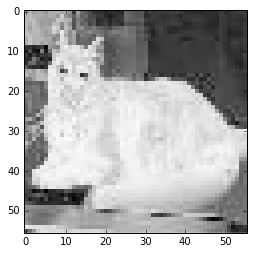

In [17]:
#Display images and check for randomization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n=12605
image_array = (all_dataset[n])
image_array.shape

plt.imshow(image_array, cmap='Greys', interpolation='None')
print(all_labels[n])

In [18]:
## Check randomized array
print('Dataset shape:', all_dataset.shape)
print('Dataset Mean:', np.mean(all_dataset))
#print('Dataset Standard deviation:', np.std(all_dataset))
print('Dataset Max:', np.amax(all_dataset))
print('Dataset Min:', np.amin(all_dataset))
print('Target shape:', all_labels.shape)
print('Target Mean:', np.mean(all_labels))
print('Target Standard deviation:', np.std(all_labels))
print('Target Max:', np.amax(all_labels))
print('Target Min:', np.amin(all_labels))

('Dataset shape:', (25000, 56, 56))
('Dataset Mean:', -0.039582387)
('Dataset Max:', 0.50196081)
('Dataset Min:', -0.49803922)
('Target shape:', (25000,))
('Target Mean:', 0.5)
('Target Standard deviation:', 0.5)
('Target Max:', 1)
('Target Min:', 0)


In [19]:
# Save the data for future use

#pickle file with 128 pixel images
#pickle_file = 'catdog.pickle'

pickle_file = 'catdog56.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'all_dataset': all_dataset,
    'all_labels': all_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [4]:
# For future runs load from pickled dataset
pickle_file = 'catdog56.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    all_dataset = save['all_dataset']
    all_labels = save['all_labels']
    del save  # hint to help gc free up memory
    print('Training set', all_dataset.shape, all_labels.shape)

('Training set', (25000, 56, 56), (25000,))


In [5]:
# split the full dataset of 25k images into train - 20k images and test - 5k images 
from sklearn import cross_validation 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
all_dataset, all_labels, test_size=0.2, random_state=20)

In [6]:
print("train dataset", X_train.shape, y_train.shape)
print("test dataset", X_test.shape, y_test.shape)

('train dataset', (20000, 56, 56), (20000,))
('test dataset', (5000, 56, 56), (5000,))


0


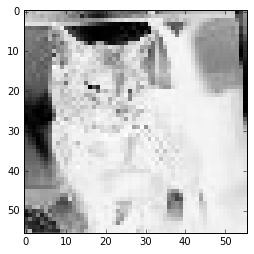

In [9]:
#Check if split has happened properly
n=2900
image_array = (X_train[n])
image_array.shape

plt.imshow(image_array, cmap='Greys', interpolation='None')
print(y_train[n])

In [26]:
# Resize training and test dataset
image_size = 56
num_labels = 2
num_channels = 1 # grayscale
def reshape(dataset, labels):
  dataset = dataset.reshape(
    (-1, image_size, image_size, num_channels)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset_full, train_labels_full = reshape(X_train, y_train)
test_dataset, test_labels = reshape(X_test, y_test)
print('Training set', train_dataset_full.shape, train_labels_full.shape)
print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (20000, 56, 56, 1), (20000, 2))
('Test set', (5000, 56, 56, 1), (5000, 2))


In [27]:
#Check how labels look
n= 3105
print(train_labels_full[n])
print(np.argmax(train_labels_full[n]))
#First column - Cat
#Second column - Dog 

[ 0.  1.]
1


In [16]:
#Define accuracy. Find closest integer and compare across predictions and labels
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [28]:
# create a small train dataset for testing algorithm
train_dataset= train_dataset_full[:5000,:,:]
train_labels= train_labels_full[:5000]
print(train_dataset.shape, train_labels.shape)

((5000, 56, 56, 1), (5000, 2))


In [34]:
#Simple convolution neural network - 2 layers with maxpool and 1 fully connected layer at the end

batch_size = 16
num_channels = 1
num_labels = 2
image_size = 56

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  def weight_variable(shape):
      initial = tf.truncated_normal(shape, stddev=0.1)
      return tf.Variable(initial)

  def bias_variable(shape):
      initial = tf.constant(0.1, shape=shape)
      return tf.Variable(initial)
    
  #Define convolution network
  def conv2d(x, W):
      return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

  def max_pool_2x2(x):
      return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
  
# First Convolution Layer weights and biases
  patch_size1 = 5
  depth1 = 32
  W_conv1 = weight_variable([patch_size1, patch_size1, num_channels, depth1])
  b_conv1 = bias_variable([depth1])
    
# Second Convolution Layer weights and biases
  patch_size2 = 5
  depth2 = 64
  W_conv2 = weight_variable([patch_size1, patch_size1, depth1, depth2])
  b_conv2 = bias_variable([depth2])

# Fully connected Layer
#Image size is now image_size/4
  num_neurons = 500
  W_fc1 = weight_variable([(image_size/4) * (image_size/4) * depth2, num_neurons])
  b_fc1 = bias_variable([num_neurons])

#Output Layer
  W_fc2 = weight_variable([num_neurons, num_labels])
  b_fc2 = bias_variable([num_labels])
                         
                         
  def model(data, keep_prob):  
    # First convolution Layer
      h_conv1 = tf.nn.relu(conv2d(data, W_conv1) + b_conv1)
      h_pool1 = max_pool_2x2(h_conv1)
    # Second convolution Layer
      h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
      h_pool2 = max_pool_2x2(h_conv2)
    #Fully connected Layer
      shape = h_pool2.get_shape().as_list()
      h_pool2_flat = tf.reshape(h_pool2, [shape[0], shape[1] * shape[2] * shape[3]])
      h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    #Droput to fully connecte layer
      keep_prob = tf.placeholder(tf.float32)
      h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    #Output Layer
      return tf.matmul(h_fc1_drop, W_fc2) + b_fc2                   
  
  # Training computation.
  # droput = 0.75
  logits = model(tf_train_dataset, 0.75)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  # No dropout for test model 
  test_prediction = tf.nn.softmax(model(tf_test_dataset, 0.0))

In [35]:
num_steps = 300

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 100 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        test_prediction.eval(), test_labels))
  #print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op u'Placeholder_2', defined at:
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-0b375a284a30>", line 77, in <module>
    logits = model(tf_train_dataset, 0.75)
  File "<ipython-input-34-0b375a284a30>", line 70, in model
    keep_prob = tf.placeholder(tf.float32)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1274, in placeholder
    name=name)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1522, in _placeholder
    name=name)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2310, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/priyankadwivedi/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1232, in __init__
    self._traceback = _extract_stack()
